In [2]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [3]:
df = pd.read_excel(r'C:\Users\stuti\OneDrive\Desktop\Output_amazon_reviews.xlsx')

In [4]:
df.head()

,Source,Model Number,Review,Stars
0,Amazon,55QNED75SRA.ATR,Osm tv in this price compare to neoqled samsun...,5.0
1,Amazon,55QNED75SRA.ATR,Overall good but black level mostly highliter....,3.0
2,Amazon,55QNED75SRA.ATR,I bought this 2 days back. I know this model d...,4.0
3,Amazon,55QNED75SRA.ATR,Go for it it's better then samsung QLED within...,5.0
4,Amazon,55QNED75SRA.ATR,Qled tv\n120hz\nVery good design\nAmazing pict...,5.0


In [5]:
df.shape

(642, 4)

In [6]:
import pandas as pd
from langdetect import detect

def is_hindi(text):
    try:
        return detect(text) == 'hi'
    except:
        return False

contains_hindi = df['Review'].apply(is_hindi).any()

if contains_hindi:
    hindi_reviews_count = 0
    hindi_reviews_indices = []
    for index, row in df.iterrows():
        if is_hindi(row['Review']):
            hindi_reviews_count += 1
            hindi_reviews_indices.append(index)
    print(f"The dataset has {hindi_reviews_count} Hindi reviews.")
else:
    print("The dataset does not contain any Hindi reviews.")


The dataset has 3 Hindi reviews.


In [7]:
df = df.drop(index=hindi_reviews_indices)

In [8]:
df

,Source,Model Number,Review,Stars
0,Amazon,55QNED75SRA.ATR,Osm tv in this price compare to neoqled samsun...,5.0
1,Amazon,55QNED75SRA.ATR,Overall good but black level mostly highliter....,3.0
2,Amazon,55QNED75SRA.ATR,I bought this 2 days back. I know this model d...,4.0
3,Amazon,55QNED75SRA.ATR,Go for it it's better then samsung QLED within...,5.0
4,Amazon,55QNED75SRA.ATR,Qled tv\n120hz\nVery good design\nAmazing pict...,5.0
...,...,...,...,...
637,Amazon,24QP550-B.ATR,Best Monitor in this Price range got it for 19...,5.0
638,Amazon,24QP550-B.ATR,Rear USB ports of monitor are not working.\nRi...,1.0
639,Amazon,24QP550-B.ATR,NaN,5.0
640,Amazon,24QP550-B.ATR,It satisfies all the functional needs of a dev...,5.0


In [9]:
print(df.iloc[132])

Source                                                     Amazon
Model Number                                    T80SNMB1Z.ABMQEIL
Review          There are lots of scratches on the display pan...
Stars                                                         3.0
Name: 133, dtype: object


In [10]:
df.dropna(how='any', inplace=True)

In [11]:
df.columns

Index(['Source', 'Model Number', 'Review', 'Stars'], dtype='object')

In [12]:
df.shape

(621, 4)

In [13]:
import demoji 
def clean_Review(Review):
    if isinstance(Review, str):
        Review = re.sub(r'\s+', ' ', Review)  
        Review = Review.lower()  
        Review = re.sub(r'[^a-z\s]', '', Review)  
        Review = demoji.replace(Review, '') 
        return Review
    else:
        return ''

In [14]:
df['clean_Review'] = df['Review'].apply(clean_Review)

In [15]:
df.head()

,Source,Model Number,Review,Stars,clean_Review
0,Amazon,55QNED75SRA.ATR,Osm tv in this price compare to neoqled samsun...,5.0,osm tv in this price compare to neoqled samsun...
1,Amazon,55QNED75SRA.ATR,Overall good but black level mostly highliter....,3.0,overall good but black level mostly highliter ...
2,Amazon,55QNED75SRA.ATR,I bought this 2 days back. I know this model d...,4.0,i bought this days back i know this model doe...
3,Amazon,55QNED75SRA.ATR,Go for it it's better then samsung QLED within...,5.0,go for it its better then samsung qled within ...
4,Amazon,55QNED75SRA.ATR,Qled tv\n120hz\nVery good design\nAmazing pict...,5.0,qled tv hz very good design amazing picture qu...


In [16]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [17]:
df['sentiment'] = df['clean_Review'].apply(get_sentiment)

In [18]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [19]:
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

In [20]:
df["sentiment_category"].value_counts() 

positive    492
negative     65
neutral      64
Name: sentiment_category, dtype: int64

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

constraints = ['#B34D22', '#EBE00C', '#1FEB0C']

def categorical_variable_summary(df, column_name):
    value_counts = df[column_name].value_counts()
    values = value_counts.values
    labels = value_counts.index.astype(str)
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    
    # Bar Plot
    axs[0].bar(labels, values, color=constraints)
    axs[0].set_title('Countplot')
    axs[0].set_xlabel(column_name)
    axs[0].set_ylabel('Count')
    
    for i in range(len(values)):
        axs[0].text(i, values[i], str(values[i]), ha='center', va='bottom', fontsize=12)
    
    # Pie Chart
    axs[1].pie(values, labels=labels, colors=constraints, autopct='%1.1f%%', textprops={'fontsize': 12})
    axs[1].set_title('Percentage')
    
    plt.tight_layout()
    plt.show()

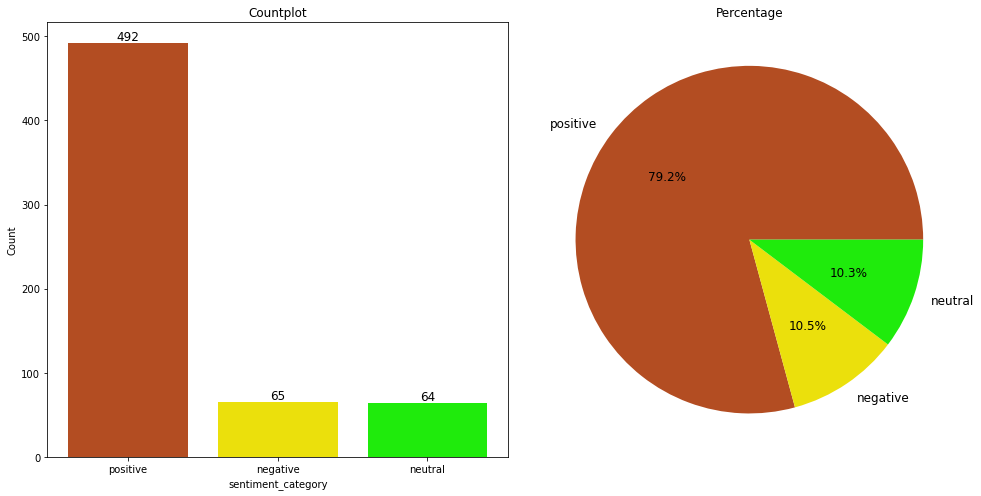

In [22]:
categorical_variable_summary(df,'sentiment_category')

In [23]:
print(df.iloc[411])

Source                             Amazon
Model Number          GL-L257CMCX.DMCZEBN
Review                Value for money 💰💰💰
Stars                                 5.0
clean_Review             value for money 
sentiment                             0.0
sentiment_category                neutral
Name: 420, dtype: object


In [24]:
from wordcloud import WordCloud

positive_review = df[df.sentiment_category == 'positive']
positive_review = positive_review.sort_values(['sentiment_category'],ascending=False)
positive_review.head()

,Source,Model Number,Review,Stars,clean_Review,sentiment,sentiment_category
0,Amazon,55QNED75SRA.ATR,Osm tv in this price compare to neoqled samsun...,5.0,osm tv in this price compare to neoqled samsun...,1.000000,positive
438,Amazon,GL-D201ASCU.ASCZEBN,Delivery & installation done on time.Performan...,5.0,delivery installation done on timeperformance...,0.400000,positive
436,Amazon,GL-D201ASCU.ASCZEBN,excellent,5.0,excellent,1.000000,positive
435,Amazon,GL-D201ASCU.ASCZEBN,The LG product line consistently delivers exce...,4.0,the lg product line consistently delivers exce...,0.200000,positive
434,Amazon,GL-D201ASCU.ASCZEBN,It has good efficiency. Storage space for one ...,5.0,it has good efficiency storage space for one o...,0.433333,positive


In [26]:
from sklearn.model_selection import train_test_split
X_train_df, X_test_df = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
print("Size of x_train:", (X_train_df.shape))
print("Size of x_test:", (X_test_df.shape))

Size of x_train: (496, 7)
Size of x_test: (125, 7)


In [28]:
X_train_df["sentiment_category"].value_counts()

positive    395
neutral      53
negative     48
Name: sentiment_category, dtype: int64

In [29]:
import nlpaug.augmenter.word.context_word_embs as aug
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle

augmenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")

def augmentedData(df, augmenter, category="negative", repetitions=1, samples=50):
    augmented_texts = []
    augmented_sources = []
    augmented_model_numbers = []
    augmented_reviews = []
    augmented_stars = []
    augmented_sentiments = []
    
    aug_df = df[df['sentiment_category'] == category].reset_index(drop=True)

    aug_df = aug_df.dropna(subset=['clean_Review'])

    for i in tqdm(np.random.randint(0, len(aug_df), samples)):
        for _ in range(repetitions):
            augmented_text = augmenter.augment(aug_df['clean_Review'].iloc[i])
            if isinstance(augmented_text, list):
                augmented_text = ' '.join(augmented_text)
            augmented_texts.append(augmented_text)
            augmented_sources.append(aug_df['Source'].iloc[i])
            augmented_model_numbers.append(aug_df['Model Number'].iloc[i])
            augmented_reviews.append(aug_df['Review'].iloc[i])
            augmented_stars.append(aug_df['Stars'].iloc[i])
            augmented_sentiments.append(aug_df['sentiment'].iloc[i])

    data = {
        'sentiment_category': [category] * len(augmented_texts),
        'Source': augmented_sources,
        'Model Number': augmented_model_numbers,
        'Review': augmented_reviews,
        'Stars': augmented_stars,
        'clean_Review': augmented_texts,
        'sentiment': augmented_sentiments
    }
    
    aug_df_new = pd.DataFrame(data)
    df = shuffle(df.append(aug_df_new, ignore_index=True))
    return df


In [30]:
from tqdm import tqdm
from sklearn.utils import shuffle
X_train_aug_df = augmentedData(X_train_df, augmenter, samples=200)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [16:27<00:00,  4.94s/it]
C:\Users\stuti\AppData\Local\Temp\ipykernel_9488\2640691266.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = shuffle(df.append(aug_df_new, ignore_index=True))


In [31]:
X_train_aug_df["sentiment_category"].value_counts()

positive    395
negative    248
neutral      53
Name: sentiment_category, dtype: int64

In [32]:
X_train_aug_df.head()

,Source,Model Number,Review,Stars,clean_Review,sentiment,sentiment_category
19,Amazon,FHM1409BDM.AMBQEIL,Perfect washing machine.good wash quality. Eas...,5.0,perfect washing machinegood wash quality easy ...,0.716667,positive
21,Amazon,27SR50F-W.ATR,Pros:\n+ Excellent picture quality\n+ 2 hdmi p...,4.0,pros excellent picture quality hdmi ports ...,0.124113,positive
651,Amazon,GL-L257CMCX.DMCZEBN,Multi air flow is worst always loose cooling a...,1.0,multi functional air conditioned flow is worst...,-0.192308,negative
257,Amazon,GL-D201ASCU.ASCZEBN,"Ice making, look, size, capacity is wonderful....",5.0,ice making look size capacity is wonderful it ...,0.650000,positive
50,Amazon,T80SNMB1Z.ABMQEIL,Its good value for money,5.0,its good value for money,0.700000,positive


In [33]:
X_train_aug_df[X_train_aug_df['Source'] == "Amazon"]

,Source,Model Number,Review,Stars,clean_Review,sentiment,sentiment_category
19,Amazon,FHM1409BDM.AMBQEIL,Perfect washing machine.good wash quality. Eas...,5.0,perfect washing machinegood wash quality easy ...,0.716667,positive
21,Amazon,27SR50F-W.ATR,Pros:\n+ Excellent picture quality\n+ 2 hdmi p...,4.0,pros excellent picture quality hdmi ports ...,0.124113,positive
651,Amazon,GL-L257CMCX.DMCZEBN,Multi air flow is worst always loose cooling a...,1.0,multi functional air conditioned flow is worst...,-0.192308,negative
257,Amazon,GL-D201ASCU.ASCZEBN,"Ice making, look, size, capacity is wonderful....",5.0,ice making look size capacity is wonderful it ...,0.650000,positive
50,Amazon,T80SNMB1Z.ABMQEIL,Its good value for money,5.0,its good value for money,0.700000,positive
...,...,...,...,...,...,...,...
330,Amazon,GL-N312SDSY.ADSZEBN,Very satisfying performance. Excellent cooling...,5.0,very satisfying performance excellent cooling ...,0.912500,positive
531,Amazon,T80SNMB1Z.ABMQEIL,"Bad delivery service , product was different f...",1.0,our bad delivery clean service product was som...,-0.350000,negative
105,Amazon,GL-L257CMCX.DMCZEBN,Great buy !,5.0,great buy,0.800000,positive
512,Amazon,T80SNMB1Z.ABMQEIL,It was bought on 20.01.22 and after 2 months W...,1.0,it was bought on and made after months wash tu...,-0.416667,negative


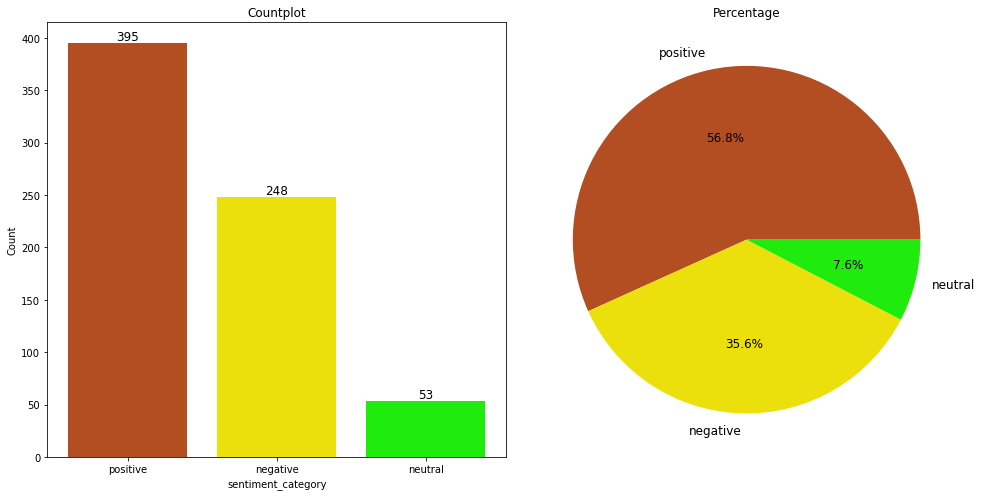

In [34]:
categorical_variable_summary(X_train_aug_df,'sentiment_category')

In [35]:
import nlpaug.augmenter.word.context_word_embs as aug
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle

augmenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")

def augmentedData(df, augmenter, category="neutral", repetitions=1, samples=50):
    augmented_texts = []
    augmented_sources = []
    augmented_model_numbers = []
    augmented_reviews = []
    augmented_stars = []
    augmented_sentiments = []
    
    aug_df = df[df['sentiment_category'] == category].reset_index(drop=True)

    aug_df = aug_df.dropna(subset=['clean_Review'])

    for i in tqdm(np.random.randint(0, len(aug_df), samples)):
        for _ in range(repetitions):
            augmented_text = augmenter.augment(aug_df['clean_Review'].iloc[i])
            if isinstance(augmented_text, list):
                augmented_text = ' '.join(augmented_text)
            augmented_texts.append(augmented_text)
            augmented_sources.append(aug_df['Source'].iloc[i])
            augmented_model_numbers.append(aug_df['Model Number'].iloc[i])
            augmented_reviews.append(aug_df['Review'].iloc[i])
            augmented_stars.append(aug_df['Stars'].iloc[i])
            augmented_sentiments.append(aug_df['sentiment'].iloc[i])

    data = {
        'sentiment_category': [category] * len(augmented_texts),
        'Source': augmented_sources,
        'Model Number': augmented_model_numbers,
        'Review': augmented_reviews,
        'Stars': augmented_stars,
        'clean_Review': augmented_texts,
        'sentiment': augmented_sentiments
    }
    
    aug_df_new = pd.DataFrame(data)
    df = shuffle(df.append(aug_df_new, ignore_index=True))
    return df


In [36]:
from tqdm import tqdm
from sklearn.utils import shuffle
X_train_aug_df = augmentedData(X_train_aug_df, augmenter, samples=200)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [03:58<00:00,  1.19s/it]
C:\Users\stuti\AppData\Local\Temp\ipykernel_9488\3645405596.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = shuffle(df.append(aug_df_new, ignore_index=True))


In [37]:
X_train_aug_df["sentiment_category"].value_counts()

positive    395
neutral     253
negative    248
Name: sentiment_category, dtype: int64

In [38]:
X_train_aug_df

,Source,Model Number,Review,Stars,clean_Review,sentiment,sentiment_category
145,Amazon,24QP550-B.ATR,Till now all looks good. Will update after som...,4.0,till now all looks good will update after some...,0.700000,positive
459,Amazon,T80SNMB1Z.ABMQEIL,Simply awesome ! Ease of use super technology ...,5.0,simply awesome ease of use super technology n...,0.326667,positive
764,Amazon,GL-D201ASCU.ASCZEBN,Not suggesting,3.0,absolutely not suggesting,0.000000,neutral
305,Amazon,T80SNMB1Z.ABMQEIL,Very worst service and worst quality.. Don't e...,1.0,very worst service and worst quality dont ever...,-0.550000,negative
635,Amazon,GL-D201ASCU.ASCZEBN,"I like size, cooling, installation, value for ...",4.0,i like size cooling installation value for mon...,-0.125000,negative
...,...,...,...,...,...,...,...
755,Amazon,GL-S262SPZX.APZZEBN,"Installation service poor,the man insisted to ...",2.0,installation of service the poorthe young man ...,0.000000,neutral
856,Amazon,24QP550-B.ATR,There is no speaker.\nIf I attach an external ...,1.0,there is no speaker if i attach an external sp...,0.000000,neutral
815,Amazon,27SR50F-W.ATR,Ultimate Picture quality,5.0,its ultimate picture quality,0.000000,neutral
707,Amazon,T80SNMB1Z.ABMQEIL,"Earlier I had Whirlpool, which was very pathet...",4.0,even earlier i only had whirlpool which also w...,0.000000,neutral


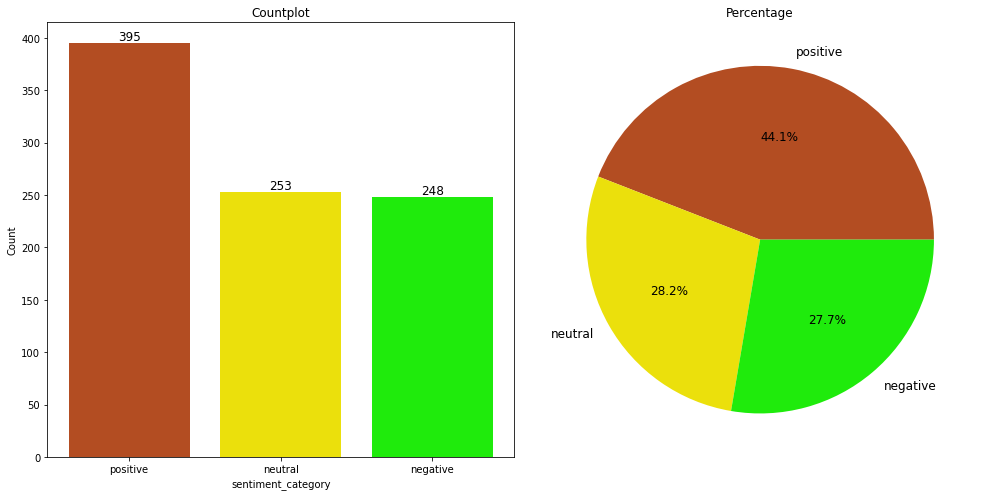

In [39]:
categorical_variable_summary(X_train_aug_df,'sentiment_category')

In [40]:
print("Size of X_train_df:", (X_train_df.shape))
print("Size of X_test_df:", (X_test_df.shape))

Size of X_train_df: (496, 7)
Size of X_test_df: (125, 7)


In [41]:
print("Size of X_train_aug_df:", (X_train_aug_df.shape))
print("Size of X_test_df:", (X_test_df.shape))

Size of X_train_aug_df: (896, 7)
Size of X_test_df: (125, 7)


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X_train_aug_df['clean_Review'])
y = X_train_aug_df['sentiment_category']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Size of X_train:", X_train.shape)
print("Size of y_train:", y_train.shape)
print("Size of X_val:", X_val.shape)
print("Size of y_val:", y_val.shape)

Size of X_train: (716, 3061)
Size of y_train: (716,)
Size of X_val: (180, 3061)
Size of y_val: (180,)


In [44]:
y_val.value_counts()

positive    82
neutral     51
negative    47
Name: sentiment_category, dtype: int64

In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

    negative       0.98      1.00      0.99        47
     neutral       0.91      1.00      0.95        51
    positive       1.00      0.93      0.96        82

    accuracy                           0.97       180
   macro avg       0.96      0.98      0.97       180
weighted avg       0.97      0.97      0.97       180



In [46]:
X_test = vectorizer.transform(X_test_df['clean_Review'])
y_test = X_test_df['sentiment_category']

print("Size of X_test:", X_test.shape)
print("Size of y_test:", y_test.shape)

Size of X_test: (125, 3061)
Size of y_test: (125,)


In [47]:
X_test_df["sentiment_category"].value_counts() 

positive    97
negative    17
neutral     11
Name: sentiment_category, dtype: int64

In [48]:
y_test_pred = random_forest_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.86      0.35      0.50        17
     neutral       0.53      0.73      0.62        11
    positive       0.88      0.94      0.91        97

    accuracy                           0.84       125
   macro avg       0.76      0.67      0.68       125
weighted avg       0.85      0.84      0.83       125



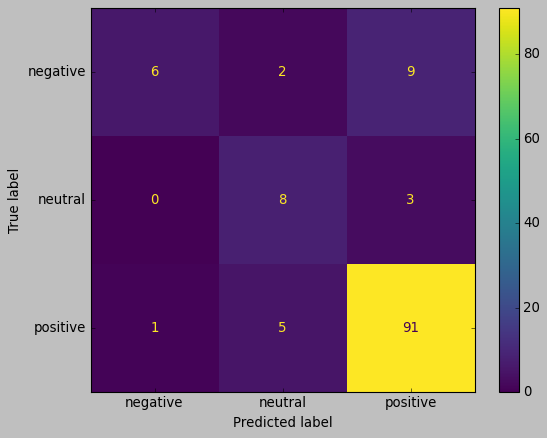

In [49]:
from matplotlib import style
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

style.use('classic')
cm = confusion_matrix(y_test,y_test_pred,labels=random_forest_model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest_model.classes_)
display.plot()

In [50]:
from sklearn.linear_model import LogisticRegression

softmax_regression_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
softmax_regression_model.fit(X_train, y_train)
y_val_pred = softmax_regression_model.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

    negative       0.85      1.00      0.92        47
     neutral       0.98      1.00      0.99        51
    positive       1.00      0.89      0.94        82

    accuracy                           0.95       180
   macro avg       0.95      0.96      0.95       180
weighted avg       0.96      0.95      0.95       180



In [51]:
y_test_pred = softmax_regression_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.64      0.53      0.58        17
     neutral       0.71      0.45      0.56        11
    positive       0.89      0.96      0.93        97

    accuracy                           0.86       125
   macro avg       0.75      0.65      0.69       125
weighted avg       0.84      0.86      0.85       125



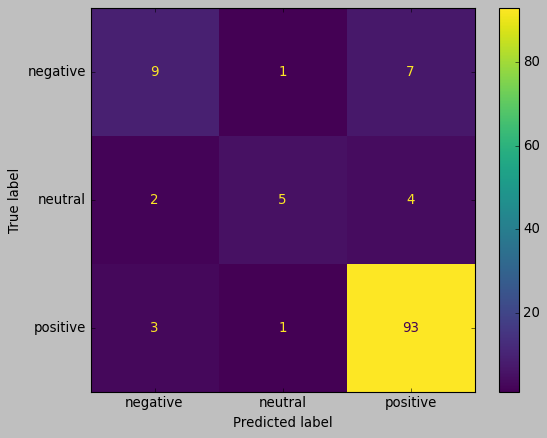

In [52]:
style.use('classic')
cm = confusion_matrix(y_test,y_test_pred,labels=softmax_regression_model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=softmax_regression_model.classes_)
display.plot()

In [53]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_encoded)

y_val_pred = xgb_model.predict(X_val)
y_val_pred_labels = label_encoder.inverse_transform(y_val_pred)

print(classification_report(y_val, y_val_pred_labels))

              precision    recall  f1-score   support

    negative       0.88      0.96      0.92        47
     neutral       0.86      1.00      0.93        51
    positive       0.99      0.84      0.91        82

    accuracy                           0.92       180
   macro avg       0.91      0.93      0.92       180
weighted avg       0.92      0.92      0.92       180



In [54]:
y_test_encoded = label_encoder.transform(y_test)

y_test_pred = xgb_model.predict(X_test)
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred)

print(classification_report(y_test, y_test_pred_labels))

              precision    recall  f1-score   support

    negative       0.53      0.47      0.50        17
     neutral       0.50      0.91      0.65        11
    positive       0.93      0.87      0.90        97

    accuracy                           0.82       125
   macro avg       0.66      0.75      0.68       125
weighted avg       0.84      0.82      0.82       125



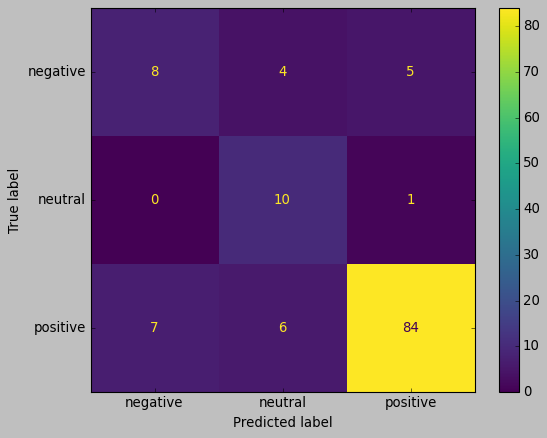

In [55]:
plt.style.use('classic')
cm = confusion_matrix(y_test, y_test_pred_labels, labels=label_encoder.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
display.plot()


In [56]:
from sklearn.model_selection import KFold, GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [57]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=kf, scoring='recall_macro',n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9554690715919388


In [58]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='recall_macro', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)


best_params = grid_search.best_params_
best_model_XGB = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [59]:
best_model_XGB.fit(X_train, y_train_encoded)

y_val_pred = best_model_XGB.predict(X_val)
y_val_pred_labels = label_encoder.inverse_transform(y_val_pred)

print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred_labels))

Validation Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.96      0.91        47
     neutral       0.86      1.00      0.93        51
    positive       0.99      0.83      0.90        82

    accuracy                           0.91       180
   macro avg       0.91      0.93      0.91       180
weighted avg       0.92      0.91      0.91       180



In [60]:
y_test_encoded = label_encoder.transform(y_test)

y_test_pred = best_model_XGB.predict(X_test)
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred)

print(classification_report(y_test, y_test_pred_labels))

              precision    recall  f1-score   support

    negative       0.46      0.35      0.40        17
     neutral       0.42      0.91      0.57        11
    positive       0.92      0.84      0.88        97

    accuracy                           0.78       125
   macro avg       0.60      0.70      0.62       125
weighted avg       0.81      0.78      0.78       125



In [63]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='recall_macro', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)


best_params = grid_search.best_params_
best_model_XGB = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
